# Problem Set by Salvin Chowdhury

## Problem 1:  Exploring the Penalty Term Hyperparameter
This problem explores how the penalty parameter C affects the performance of a linear SVM using the Wine dataset. We relabel the classes into a binary problem, train SVMs with different C values and analyze how changes in C influence the decision boundary, margins & support vectors.

In [1]:

"""
    1. load in the wine dataset from scikit-learn
    2. relabel the response variable so that class 2 becomes class 1 and classes 0 and 1 become class 0
    3. 
"""

# import libraries
from sklearn.datasets import load_wine
import numpy as np

# loading the wine dataset
wine = load_wine()
print("Features: ", wine.feature_names)
print("Target Classes: ", set(wine.target))

y = wine.target

# np.where(condition, value_if_true, value_if_false)
# class 2 becomes class 1 | class 0 and 1 become class 0
y_binary = np.where(y == 2, 1, 0)   



Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes:  {np.int64(0), np.int64(1), np.int64(2)}


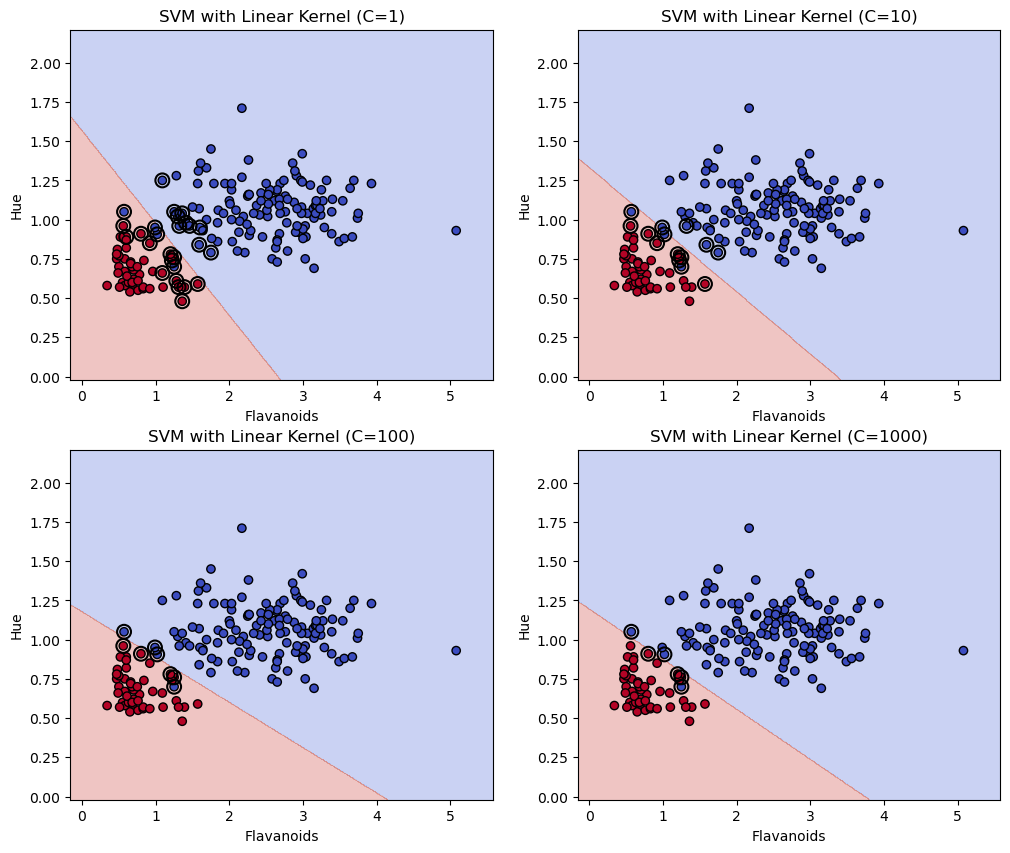

In [2]:

"""

    3. Train SVM models with a linear kernel and C values of [1,10,100,1000] on the hue and flavanoids features using the SVC class. 
    (Features 10 and 6, respectively.)

"""

# import libraries
import matplotlib.pyplot as plt
from sklearn.svm import SVC

c_vals = [1, 10, 100, 1000]
X = wine.data[:, [6, 10]]

plt.figure(figsize=(12, 10))

# looping through the c values
for i, c_vals in enumerate(c_vals):

    model = SVC(kernel='linear', C=c_vals)
    model.fit(X, y_binary)

    plt.subplot(2, 2, i+1)

    # decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # data points
    plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.coolwarm, edgecolors='k')

    # support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)

    # final plotting
    plt.title(f"SVM with Linear Kernel (C={c_vals})")
    plt.xlabel("Flavanoids")
    plt.ylabel("Hue")


plt.show() 



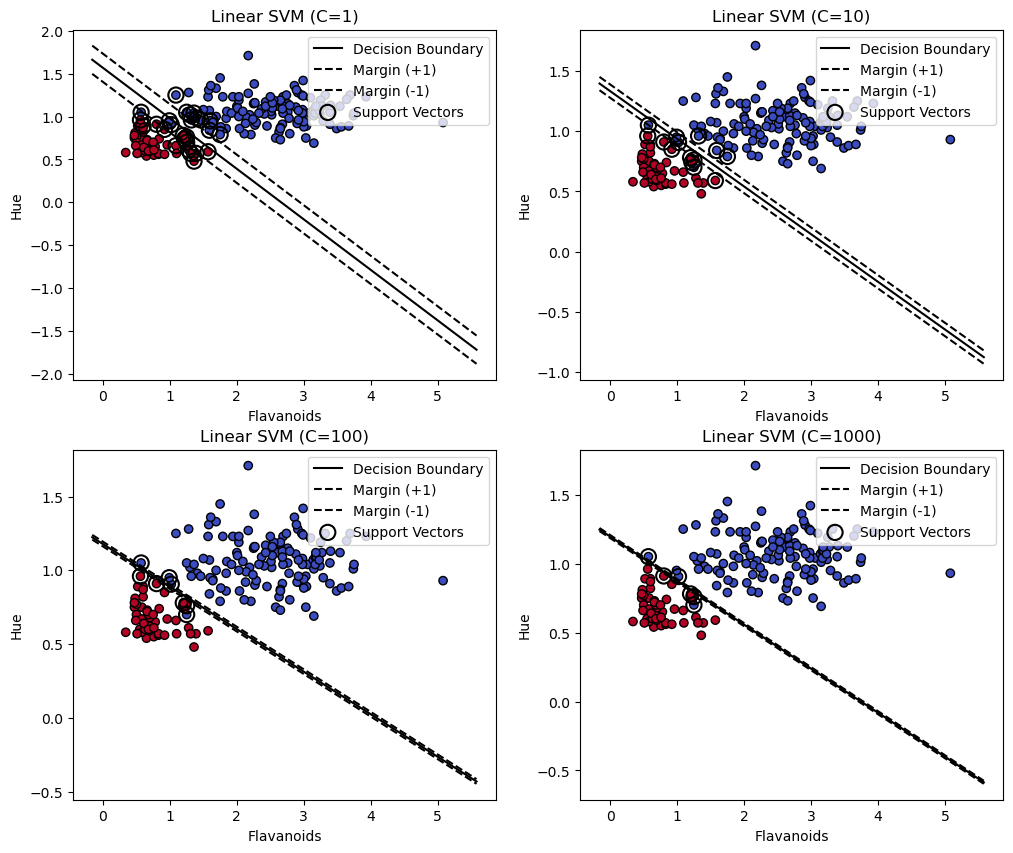

In [3]:

"""
    4. Plot the decision boundary, margins, and support vectors for each model. Describe how the decision boundary, margins, and support vectors 
    change with the different values of C.
"""


c_values = [1, 10, 100, 1000]
plt.figure(figsize=(12, 10))

for i, C in enumerate(c_values):

    model = SVC(kernel='linear', C=C)
    model.fit(X, y_binary)

    w = model.coef_[0]
    b = model.intercept_[0]

    # grid for plotting
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx = np.linspace(x_min, x_max, 200)
    
    # the decision boundary
    yy = -(w[0] * xx + b) / w[1]

    # adding in margins
    margin = 1 / np.linalg.norm(w)
    yy_plus = yy + (w[0] / w[1]) * margin
    yy_minus = yy - (w[0] / w[1]) * margin

    # creating sub plots
    plt.subplot(2, 2, i + 1)

    # plotting data points
    plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.coolwarm, edgecolors='k')


    # decision boundaries with margin
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
    plt.plot(xx, yy_plus, 'k--', label='Margin (+1)')
    plt.plot(xx, yy_minus, 'k--', label='Margin (-1)')

    # plotting the support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=120, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')


    # adding in plot details
    plt.title(f"Linear SVM (C={C})")
    plt.xlabel("Flavanoids")
    plt.ylabel("Hue")
    plt.legend(loc='upper right')


# displaying the plot
plt.show()

## Problem 2: The Problem with Kernels
In this problem, we explore how data that is not linearly serparable in lower dimensions can become linearly separable when transformed into higher dimensional spaces using non-linear mappings. This demonstrates the core idea behind the kernel trick in SVMs which allows for complex boundaries to be found efficiently without explictly computing higher-dimensional transformations.

## Problem A

In this problem, we look at the dataset `kernel_problem_1.csv` which has one feature (x1) and one class label (y), which are linearly separable since all class 0 points occur before all class 1 points. We then look for a decision boundary which separates the classes nicely.

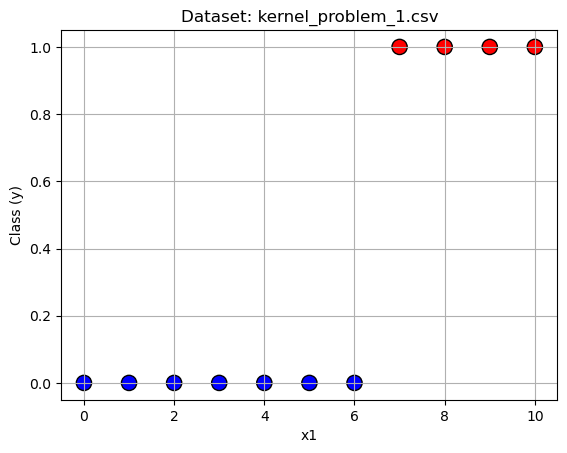

In [4]:

"""
    Example 1D
        i. Load in the dataset kernel_problem_1.csv. Rows are observations, the first column refer to x1 features, and the second column is 
        given class (y).

        ii. Plot the observations (note: we have seen observations described by 2 features so far, but that is not always the case. Observations 
        could be described by a single feature). Are these features linearly separable?
"""

# required imports
import pandas as pd
import matplotlib.pyplot as plt

# reading the .csv file
one_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/8_week-eight/pset/data/Kernel_Problem_1.csv", header=None, names=['x1', 'y'])

# plotting the dataframe
plt.scatter(one_df["x1"], one_df["y"], c=one_df["y"], cmap="bwr", edgecolors="k", s=120)
plt.xlabel("x1")
plt.ylabel("Class (y)")
plt.title("Dataset: kernel_problem_1.csv")
plt.grid(True)
plt.show()



Data is linearly separable
Decision boundary (hyperplane) at x1 = 6.5


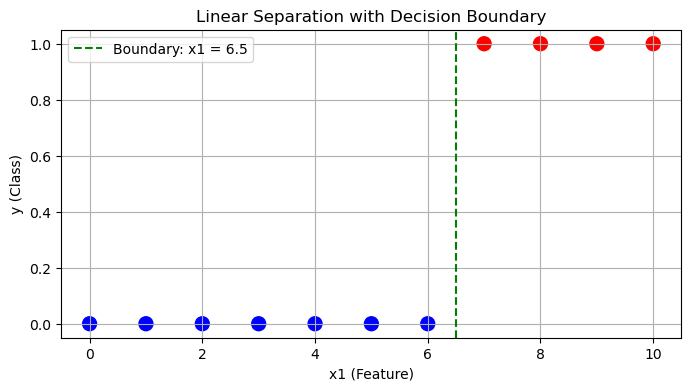

In [5]:

"""
    Example 1D
    
        iii. Give the hyperplane that will divide this space by the given classes.

"""

x0_max = one_df[one_df["y"] == 0]["x1"].max()
x1_min = one_df[one_df["y"] == 1]["x1"].min()

if x0_max < x1_min:
    print("Data is linearly separable")
else:
    print("Data isn't linearly separable")

# finding the boundary
boundary = (x0_max + x1_min) / 2
print("Decision boundary (hyperplane) at x1 =", boundary)

# plotting with the boundary
plt.figure(figsize=(8, 4))
plt.scatter(one_df["x1"], one_df["y"], c=one_df["y"], cmap="bwr", s=100)
plt.axvline(x=boundary, color="green", linestyle="--", label=f"Boundary: x1 = {boundary}")
plt.xlabel("x1 (Feature)")
plt.ylabel("y (Class)")
plt.title("Linear Separation with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

### Problem B
In this problem, we explore the use of the kernel trick, which is a mapping of the non-linearly separable data into higher dimensions so it becomes separable.

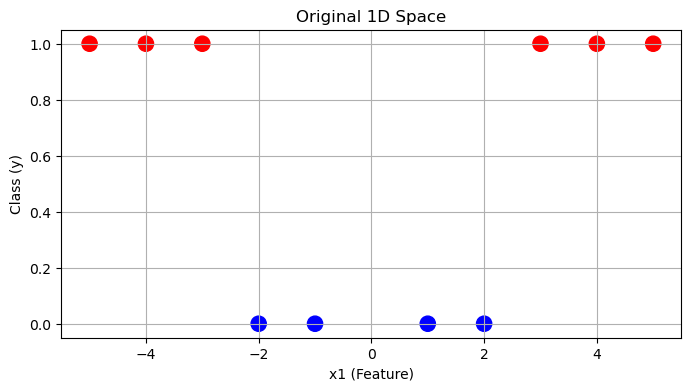

In [ ]:

"""

    - load in the dataset kernel_problem_2.csv. Rows are observations, the first column refer to x1 features, and the second columnis 
        given class (y).
    
    - Plot the observations (note: we have seen observations described by 2 features so far, but that is not always the case. Observations could 
        be described by a single feature). 

    - these features aren't linearly separable
"""

# importing libraries
import pandas as pd

# creating the dataframe
df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/8_week-eight/pset/data/Kernel_Problem_2.csv", header=None, names=["x1", "y"])


# plotting code
plt.figure(figsize=(8,4))
plt.scatter(df["x1"], df["y"], c=df["y"], cmap="bwr", s=120)
plt.xlabel("x1 (Feature)")
plt.ylabel("Class (y)")
plt.title("Original 1D Space")
plt.grid(True)
plt.show()




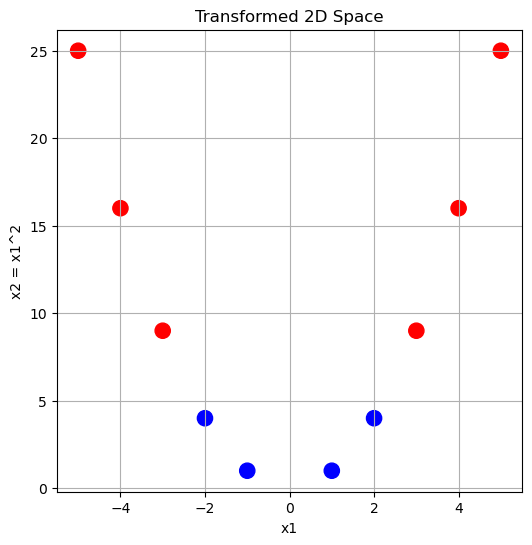

In [ ]:

"""

    - Use the following function to describe these observations in 2-dimensional space: x2 = x1^2. Plot the observations in 2-dimensional 
        space. Are these same observations now linearly separable?

    - the features are now linearly separable  


"""

# mapping
df["x2"] = df["x1"] ** 2

# plotting code
plt.figure(figsize=(6,6))
plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr", s=120)
plt.xlabel("x1")
plt.ylabel("x2 = x1^2")
plt.title("Transformed 2D Space")
plt.grid(True)
plt.show()

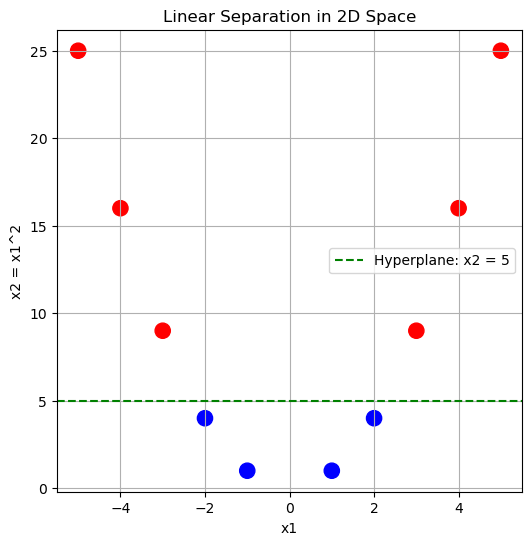

In [8]:

"""

    - in this higher dimensional space, use the following description of a hyperplane and a threshold to classify the points.
        - n = <0,1> and r0 = (0,5)
        - y = 0 if f(x) < 0 and y = 1 if f(x) >= 1

"""

# classifying the points
df["f_x"] = df["x2"] - 5
df["y_pred"] = (df["f_x"] >= 0).astype(int)

# the separating hyperplane being plotted
plt.figure(figsize=(6,6))
plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr", s=120,)
plt.axhline(y=5, color="green", linestyle="--", label="Hyperplane: x2 = 5")
plt.xlabel("x1")
plt.ylabel("x2 = x1^2")
plt.title("Linear Separation in 2D Space")
plt.legend()
plt.grid(True)
plt.show()

### Problem C
In this problem, we use the dataset `kernel_problem_3.csv` which has two features and one class label that aren't linearly separable in a two dimensional space. We will then transform the data into a three dimensional space, where the observations become linearly separable when viewed across different feature pair plots.

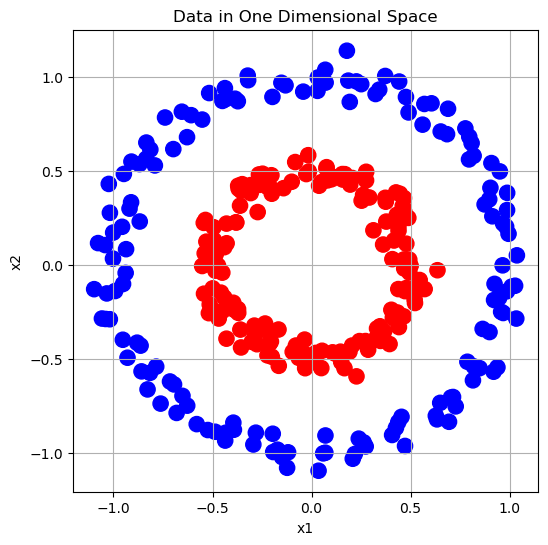

In [ ]:

""" 

    - load in the dataset kernel_problem_3.csv. Rows are observations, the first and second column refer to features, the third column is given 
    class (y).

    - the observation are not linearly sepabale


"""

# creating the data frame
df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/8_week-eight/pset/data/Kernel_Problem_3.csv", names=["x1", "x2", "y"])

# performing the plotting
plt.figure(figsize=(6,6))
plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr", s=120)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data in One Dimensional Space")
plt.grid(True)
plt.show()


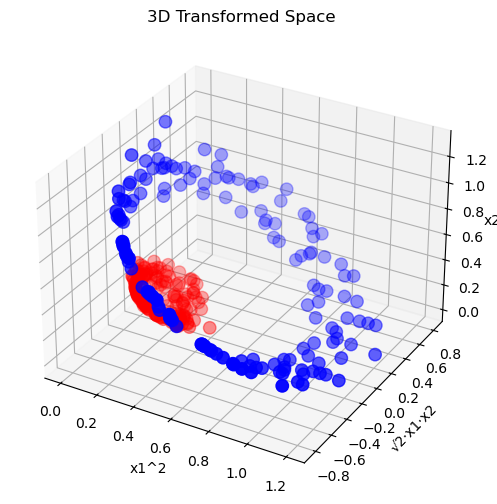

In [10]:

"""

    - use the function to describe these observations in 3-dimensional space        

"""

# required imports
import numpy as np

df["x1_sq"] = df["x1"] ** 2
df["x2_sq"] = df["x2"] ** 2
df["sqrt2_x1x2"] = np.sqrt(2) * df["x1"] * df["x2"]

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["x1_sq"], df["sqrt2_x1x2"], df["x2_sq"], c=df["y"], cmap="bwr", s=80)
ax.set_xlabel("x1^2")
ax.set_ylabel("√2·x1·x2")
ax.set_zlabel("x2^2")
ax.set_title("3D Transformed Space")
plt.show()

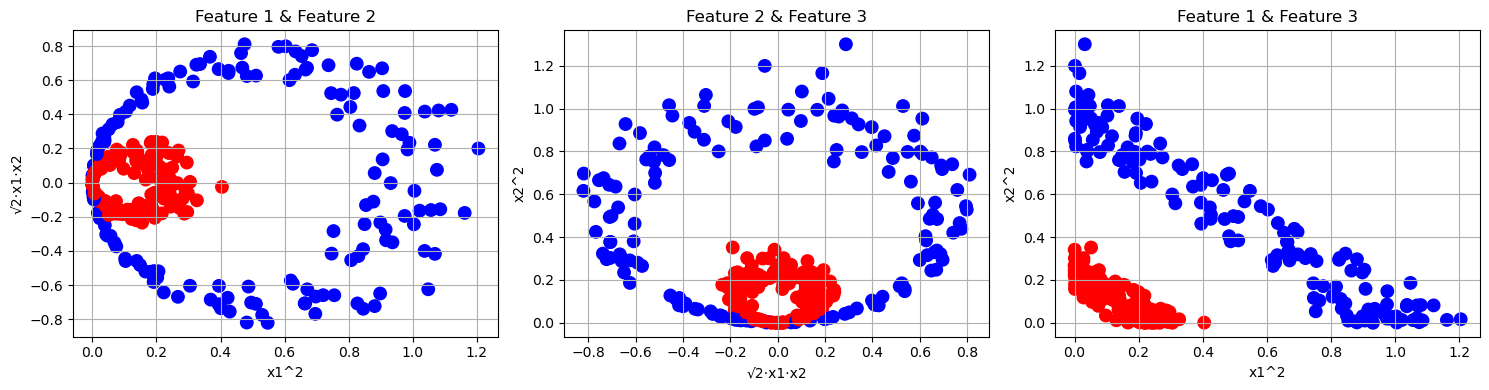

In [ ]:

"""
    - plot the observations from 3 separate perspectives - feature1 x feature2 , feature2 x feature3 , feature1 x feature3. 
    - the features are now linearly separable

"""


plt.figure(figsize=(15,4))

# (x1^2 vs √2x1x2)
plt.subplot(1,3,1)
plt.scatter(df["x1_sq"], df["sqrt2_x1x2"], c=df["y"], cmap="bwr", s=80)
plt.xlabel("x1^2")
plt.ylabel("√2·x1·x2")
plt.title("Feature 1 & Feature 2")
plt.grid(True)

# (√2x1x2 vs x2^2)
plt.subplot(1,3,2)
plt.scatter(df["sqrt2_x1x2"], df["x2_sq"], c=df["y"], cmap="bwr", s=80)
plt.xlabel("√2·x1·x2")
plt.ylabel("x2^2")
plt.title("Feature 2 & Feature 3")
plt.grid(True)

# (x1^2 vs x2^2)
plt.subplot(1,3,3)
plt.scatter(df["x1_sq"], df["x2_sq"], c=df["y"], cmap="bwr", s=80)
plt.xlabel("x1^2")
plt.ylabel("x2^2")
plt.title("Feature 1 & Feature 3")
plt.grid(True)

plt.tight_layout()
plt.show()